In [21]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
from sklearn import preprocessing #предобработка
from sklearn.model_selection import train_test_split #разделение выборки


In [3]:
data = pd.read_csv('data/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
print(data.shape)
# (1338, 7)

(1338, 7)


In [5]:
display(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
display(data.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
#кодируем бинарные категориальные признаки
data['smoker'] = data['smoker'].apply(lambda x: 0 if x == 'no' else 1)
data['sex'] = data['sex'].apply(lambda x: 0 if x == 'female' else 1)
#оставшиеся категориальные признаки кодируем с помощью OneHot
data = pd.get_dummies(data)
data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [8]:
features = data.drop('charges', axis=1).columns
X, y = data[features], data['charges']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [10]:
X_test.shape[0]

268

In [11]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [12]:
print(lin_reg.intercept_)

-12390.804294570278


In [14]:
y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)

In [15]:
# тренировочная
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y_train, y_pred_train)))
# Среднее абсолютное отклонение
print('MAE score: {:.0f} thou. $'.format(metrics.mean_absolute_error(y_train, y_pred_train)))
#Рассчитываем MAPE
print('MAPE score: {:.0f} %'.format(metrics.mean_absolute_percentage_error(y_train, y_pred_train) * 100))


R2 score: 0.742
MAE score: 4208 thou. $
MAPE score: 42 %


In [16]:
# тестовая
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y_test, y_pred_test)))
# Среднее абсолютное отклонение
print('MAE score: {:.0f} thou. $'.format(metrics.mean_absolute_error(y_test, y_pred_test)))
#Рассчитываем MAPE
print('MAPE score: {:.0f} %'.format(metrics.mean_absolute_percentage_error(y_test, y_pred_test) * 100))

R2 score: 0.784
MAE score: 4181 thou. $
MAPE score: 47 %


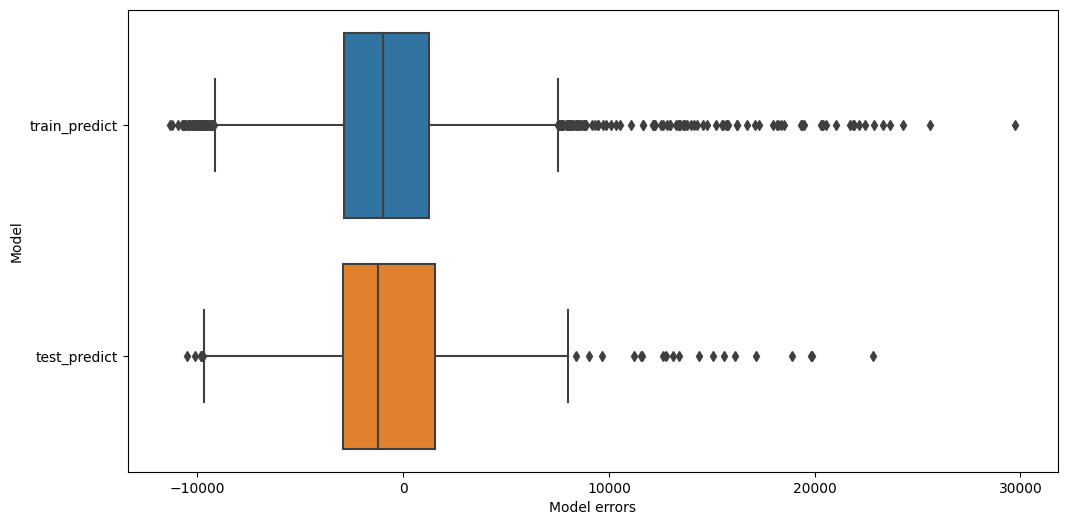

In [17]:
#Визуализируем ошибки
fig, ax = plt.subplots(figsize=(12, 6)) #фигура + координатная плоскость
#Ошибки модели на тренировочном наборе данных
y_errors_train = y_train - lin_reg.predict(X_train)
#Ошибки модели на всех факторах
y_errors_test = y_test - lin_reg.predict(X_test)
#Для удобства визуализации составим DataFrame из ошибок
errors_df = pd.DataFrame(
    {'train_predict': y_errors_train, 
     'test_predict': y_errors_test
    }
)
#Строим boxplot для ошибок
sns.boxplot(data=errors_df, orient='h', ax=ax)
ax.set_xlabel('Model errors') #название оси абсцисс
ax.set_ylabel('Model'); #название оси ординат

In [18]:
mm_scaler = preprocessing.MinMaxScaler()
#Производим нормализацию
mm_scaler.fit(X_train)
X_train_scaled = mm_scaler.transform(X_train)
X_test_scaled = mm_scaler.transform(X_test)
#Составляем DataFrame из результата
X_train_scaled = pd.DataFrame(X_train_scaled, columns=features)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=features)

In [19]:
X_train_scaled.head(5)

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,0.608696,0.0,0.107345,0.4,0.0,0.0,1.0,0.0,0.0
1,0.630435,0.0,0.224913,0.0,0.0,1.0,0.0,0.0,0.0
2,0.739130,0.0,0.239440,0.0,0.0,0.0,0.0,1.0,0.0
3,0.456522,0.0,0.493947,1.0,0.0,0.0,0.0,1.0,0.0
4,0.782609,0.0,0.148238,0.6,0.0,0.0,1.0,0.0,0.0


In [24]:
polynom = preprocessing.PolynomialFeatures(2, include_bias=False)
X_train_plnm = polynom.fit_transform(X_train_scaled)
X_test_plnm = polynom.fit_transform(X_test_scaled)

In [30]:
lin_reg_plnm = linear_model.LinearRegression()
lin_reg_plnm.fit(X_train_plnm, y_train)
y_test_plnm = lin_reg_plnm.predict(X_test_plnm)
print('R2 score: {:.3f}'.format(metrics.r2_score(y_test, y_test_plnm)))


R2 score: 0.867


In [31]:
print(lin_reg_plnm.coef_)

[-3.62937658e+16  2.16522965e+17 -2.03986655e+14  8.10326085e+15
 -4.36257915e+14 -1.89612010e+16 -5.38112952e+15  2.76582946e+15
 -1.61527748e+16  8.40800000e+03  8.34000000e+02  9.44000000e+02
 -1.69000000e+03  9.60000000e+01  3.62937658e+16  3.62937658e+16
  3.62937658e+16  3.62937658e+16 -1.87468634e+17  6.76500000e+02
 -1.26325000e+03  2.56500000e+02 -2.90543310e+16 -2.90543310e+16
 -2.90543310e+16 -2.90543310e+16 -9.79400000e+03  1.62743750e+03
  5.48313438e+04  2.03986655e+14  2.03986655e+14  2.03986655e+14
  2.03986655e+14 -2.09600000e+03 -2.22700000e+03 -8.10326085e+15
 -8.10326085e+15 -8.10326085e+15 -8.10326085e+15  2.10711707e+15
 -1.67085915e+15 -1.67085915e+15 -1.67085915e+15 -1.67085915e+15
  8.55974841e+15  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -5.02032306e+15  0.00000000e+00  0.00000000e+00 -1.31672820e+16
  0.00000000e+00  5.75132218e+15]


In [32]:
#Создаём объект класса линейной регрессии с L1-регуляризацией
lasso_lr_poly = linear_model.Lasso(max_iter=2000)
#Обучаем модель
lasso_lr_poly.fit(X_train_plnm, y_train)
#Делаем предсказание для тренировочной выборки
y_train_predict_poly = lasso_lr_poly.predict(X_train_plnm)
#Делаем предсказание для тестовой выборки
y_test_predict_poly = lasso_lr_poly.predict(X_test_plnm)

In [33]:
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict_poly)))
# Среднее абсолютное отклонение
print('MAE score: {:.0f} thou. $'.format(metrics.mean_absolute_error(y_test, y_test_predict_poly)))
#Рассчитываем MAPE
print('MAPE score: {:.0f} %'.format(metrics.mean_absolute_percentage_error(y_test, y_test_predict_poly) * 100))

R2 score: 0.867
MAE score: 2719 thou. $
MAPE score: 30 %


In [34]:
#Создаём объект класса линейной регрессии с L2-регуляризацией
ridge_lr_poly = linear_model.Ridge()
#Обучаем модель
ridge_lr_poly.fit(X_train_plnm, y_train)
#Делаем предсказание для тренировочной выборки
y_train_predict_poly = ridge_lr_poly.predict(X_train_plnm)
#Делаем предсказание для тестовой выборки
y_test_predict_poly = ridge_lr_poly.predict(X_test_plnm)

In [35]:
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict_poly)))
# Среднее абсолютное отклонение
print('MAE score: {:.0f} thou. $'.format(metrics.mean_absolute_error(y_test, y_test_predict_poly)))
#Рассчитываем MAPE
print('MAPE score: {:.0f} %'.format(metrics.mean_absolute_percentage_error(y_test, y_test_predict_poly) * 100))

R2 score: 0.863
MAE score: 2861 thou. $
MAPE score: 31 %
